# `Objective`

The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. This is a classification problem.

## `About Dataset`

<div class="text_cell_render border-box-sizing rendered_html">
<p><strong>1. Categorical Attributes</strong></p>
<ul>
<li><strong>workclass</strong>:  Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<ul>
<li>Individual work category  </li>
</ul>
</li>
<li><strong>education</strong>: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<ul>
<li>Individual's highest education degree  </li>
</ul>
</li>
<li><strong>marital-status</strong>: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<ul>
<li>Individual marital status  </li>
</ul>
</li>
<li><strong>occupation</strong>:  Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<ul>
<li>Individual's occupation  </li>
</ul>
</li>
<li><strong>relationship</strong>:  Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<ul>
<li>Individual's relation in a family   </li>
</ul>
</li>
<li><strong> race</strong>:  White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<ul>
<li>Race of Individual   </li>
</ul>
</li>
<li><strong>sex</strong>:  Female, Male.</li>
<li><strong>native-country</strong>:  United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&amp;Tobago, Peru, Hong, Holand-Netherlands.<ul>
<li>Individual's native country   </li>
</ul>
</li>
</ul>

</div>

<p><strong>2. Continuous Attributes</strong></p>
<ul>
<li><strong>age</strong>: continuous.<ul>
<li>Age of an individual  </li>
</ul>
</li>
<li><strong>fnlwgt</strong>: final weight, continuous. </li>
<li>The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.</li>
<li><strong>capital-gain</strong>: continuous.</li>
<li><strong>capital-loss</strong>: continuous.</li>
<li><strong>hours-per-week</strong>: continuous.<ul>
<li>Individual's working hour per week   </li>
</ul>
</li>
</ul>

## `Importing libraries`

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## `Importing dataset`

In [12]:
df = pd.read_csv('adult.csv')

**Top 5 rows**

In [13]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [15]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

**Shape of data**

In [16]:
print('number of rows in dataset = ',df.shape[0])
print('number of columns in dataset = ',df.shape[1])

number of rows in dataset =  48842
number of columns in dataset =  15


## `Data Wrangling or Data Cleaning or Data Pre-processing`

**Removing duplicates**

In [17]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [18]:
df.drop_duplicates(inplace = True,ignore_index=True)

In [19]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [20]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


**`Missing values`**
<br> It could be represented as '?', 'N/A', '0' or just blank cell

In [21]:
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [25]:
df['workclass'].replace('?',df['workclass'].value_counts().idxmax(),inplace = True)

In [33]:
for col in (df.select_dtypes(include='object').columns):
    print( df[col].value_counts())
    print('---------------------------------------------------------')

Private             36655
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
---------------------------------------------------------
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64
---------------------------------------------------------
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64
------------

In [34]:
df['occupation'].replace('?',df['occupation'].value_counts().idxmax(),inplace = True)
df['native-country'].replace('?',df['native-country'].value_counts().idxmax(),inplace = True)

In [36]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [37]:
df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

In [38]:
df['income'] = df['income'].map({'<=50K':0,'>50K':1})

In [39]:
df['income'].value_counts()

0    37109
1    11681
Name: income, dtype: int64

# `Exploratory Data Analysis(EDA)`

How to choose the right visualization method?<br>
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

**`Spliting of numerical and categorical columns`**

In [40]:
num_col = df.select_dtypes(include= ['float','int']).columns
cat_col = df.select_dtypes(include= ['object']).columns

In [41]:
num_col,cat_col

(Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
        'hours-per-week', 'income'],
       dtype='object'),
 Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'gender', 'native-country'],
       dtype='object'))

## `Outlier handling`

In [42]:
q1 = df[num_col].quantile(0.25)
q3 = df[num_col].quantile(0.75)
IQR = q3 - q1

In [43]:
IQR

age                    20.00
fnlwgt             120051.25
educational-num         3.00
capital-gain            0.00
capital-loss            0.00
hours-per-week          5.00
income                  0.00
dtype: float64

In [44]:
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)

In [45]:
print('Outliers below:\n',df[num_col].lt(q1 - 1.5*IQR).sum())
print()
print('Outliers above:\n',df[num_col].gt(q3 + 1.5*IQR).sum())

Outliers below:
 age                   0
fnlwgt                0
educational-num    1787
capital-gain          0
capital-loss          0
hours-per-week     8277
income                0
dtype: int64

Outliers above:
 age                  215
fnlwgt              1453
educational-num        0
capital-gain        4035
capital-loss        2282
hours-per-week      5209
income             11681
dtype: int64


### `Univariate Analysis`:<br>
Data consists of only one variable (only x value).<br>
   a. Line Plots / Bar Charts<br>
   b. Histograms<br>
   c. Box Plots<br>
   d. Count Plots<br>
   e. Descriptive Statistics techniques<br>


**`Boxplots`**

In [ ]:
len(num_col)

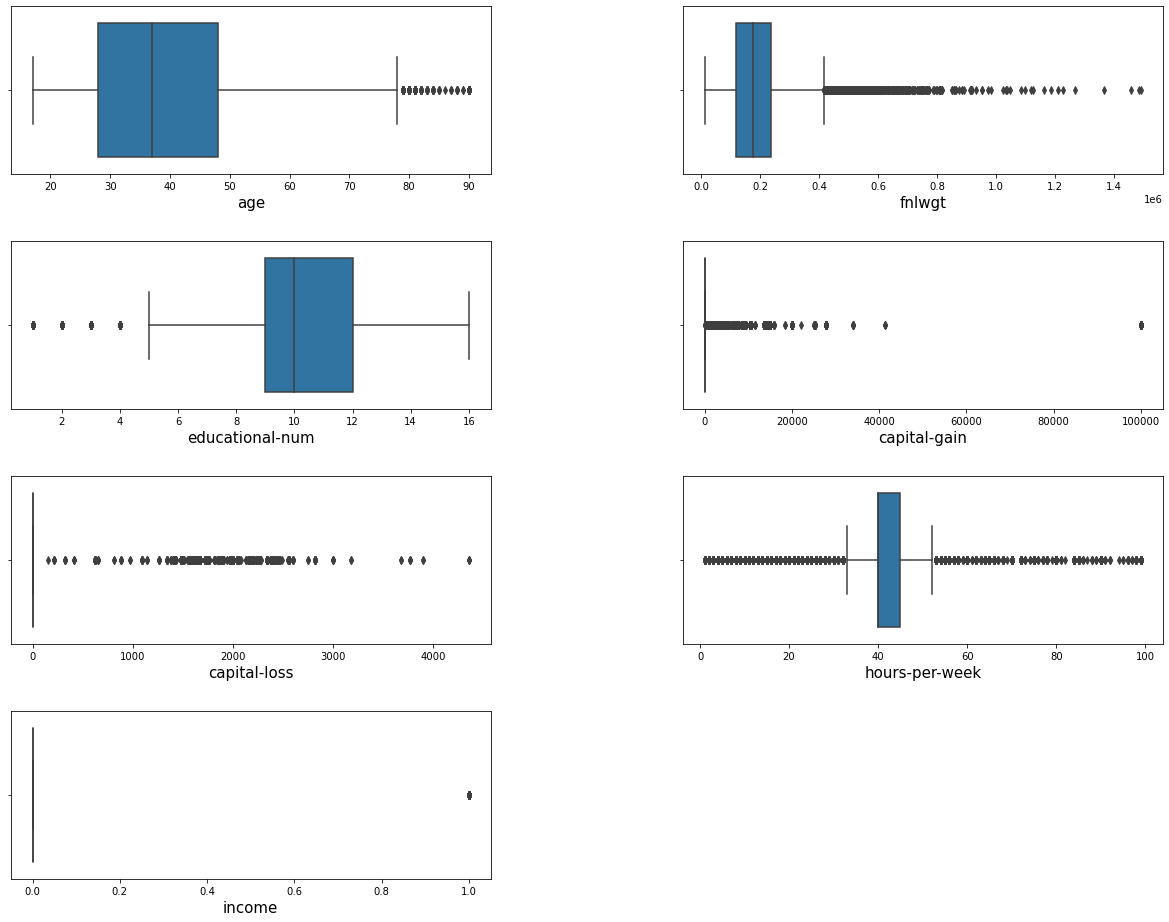

In [46]:
plt.figure(figsize=(20,60))

for i, col in enumerate(num_col):
    plt.subplot(15,2,i+1)
    sns.boxplot(df[col])
    
    plt.xlabel(col,fontsize = 15)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

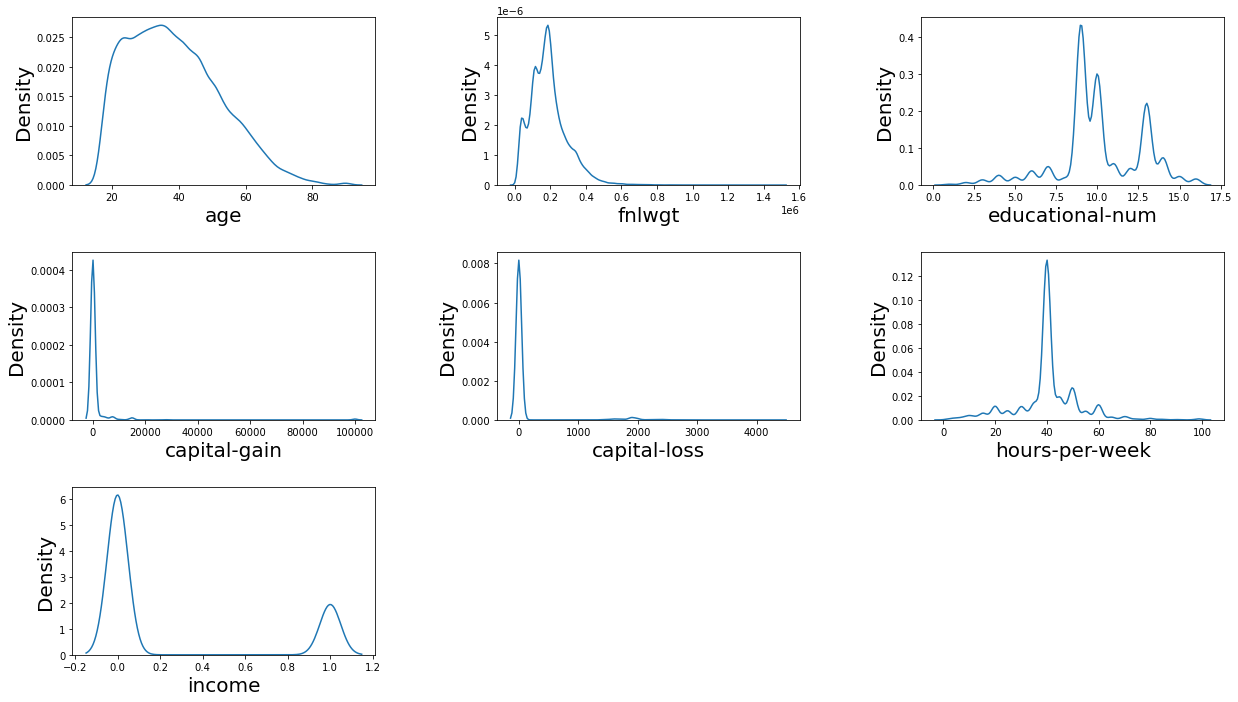

In [47]:
plt.figure(figsize=(20,60))

for i, col in enumerate(num_col):
    plt.subplot(15,3,i+1)
    sns.distplot(df[col],hist = False)
    plt.ylabel('Density',fontsize = 20)
    plt.xlabel(col,fontsize = 20)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

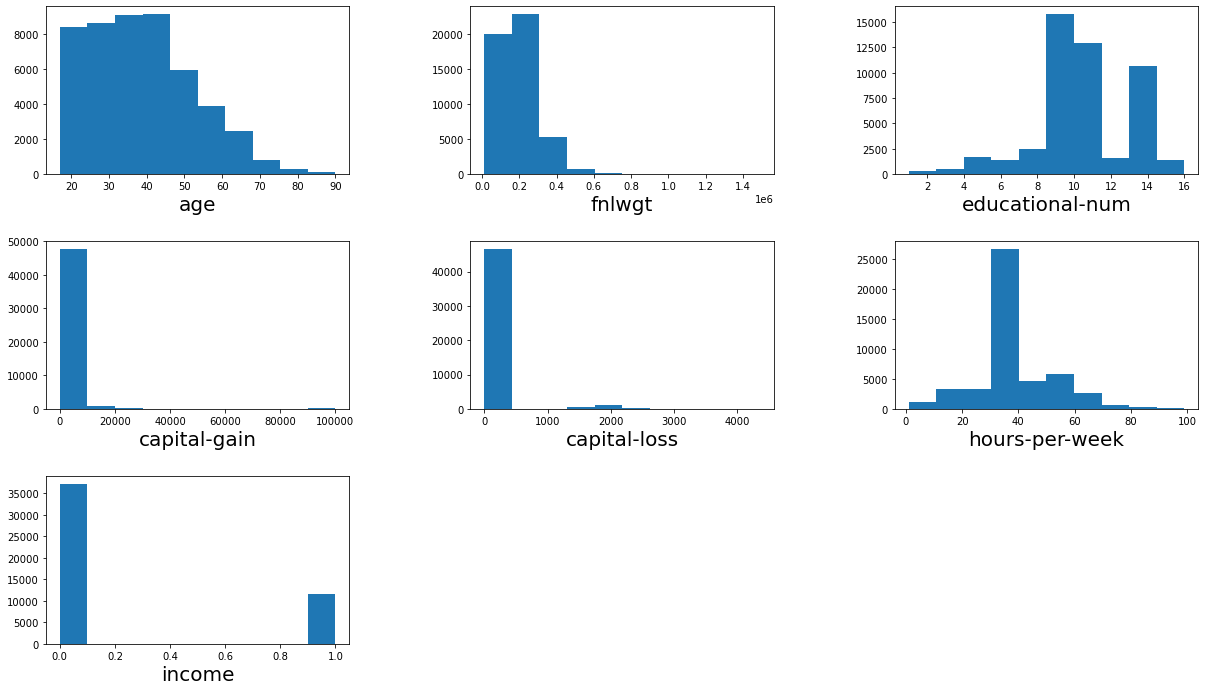

In [48]:
plt.figure(figsize=(20,60))
for i, col in enumerate(num_col):
    plt.subplot(15,3,i+1)
    plt.hist(df[col])
    plt.xlabel(col,fontsize = 20)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [49]:
cat_col

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

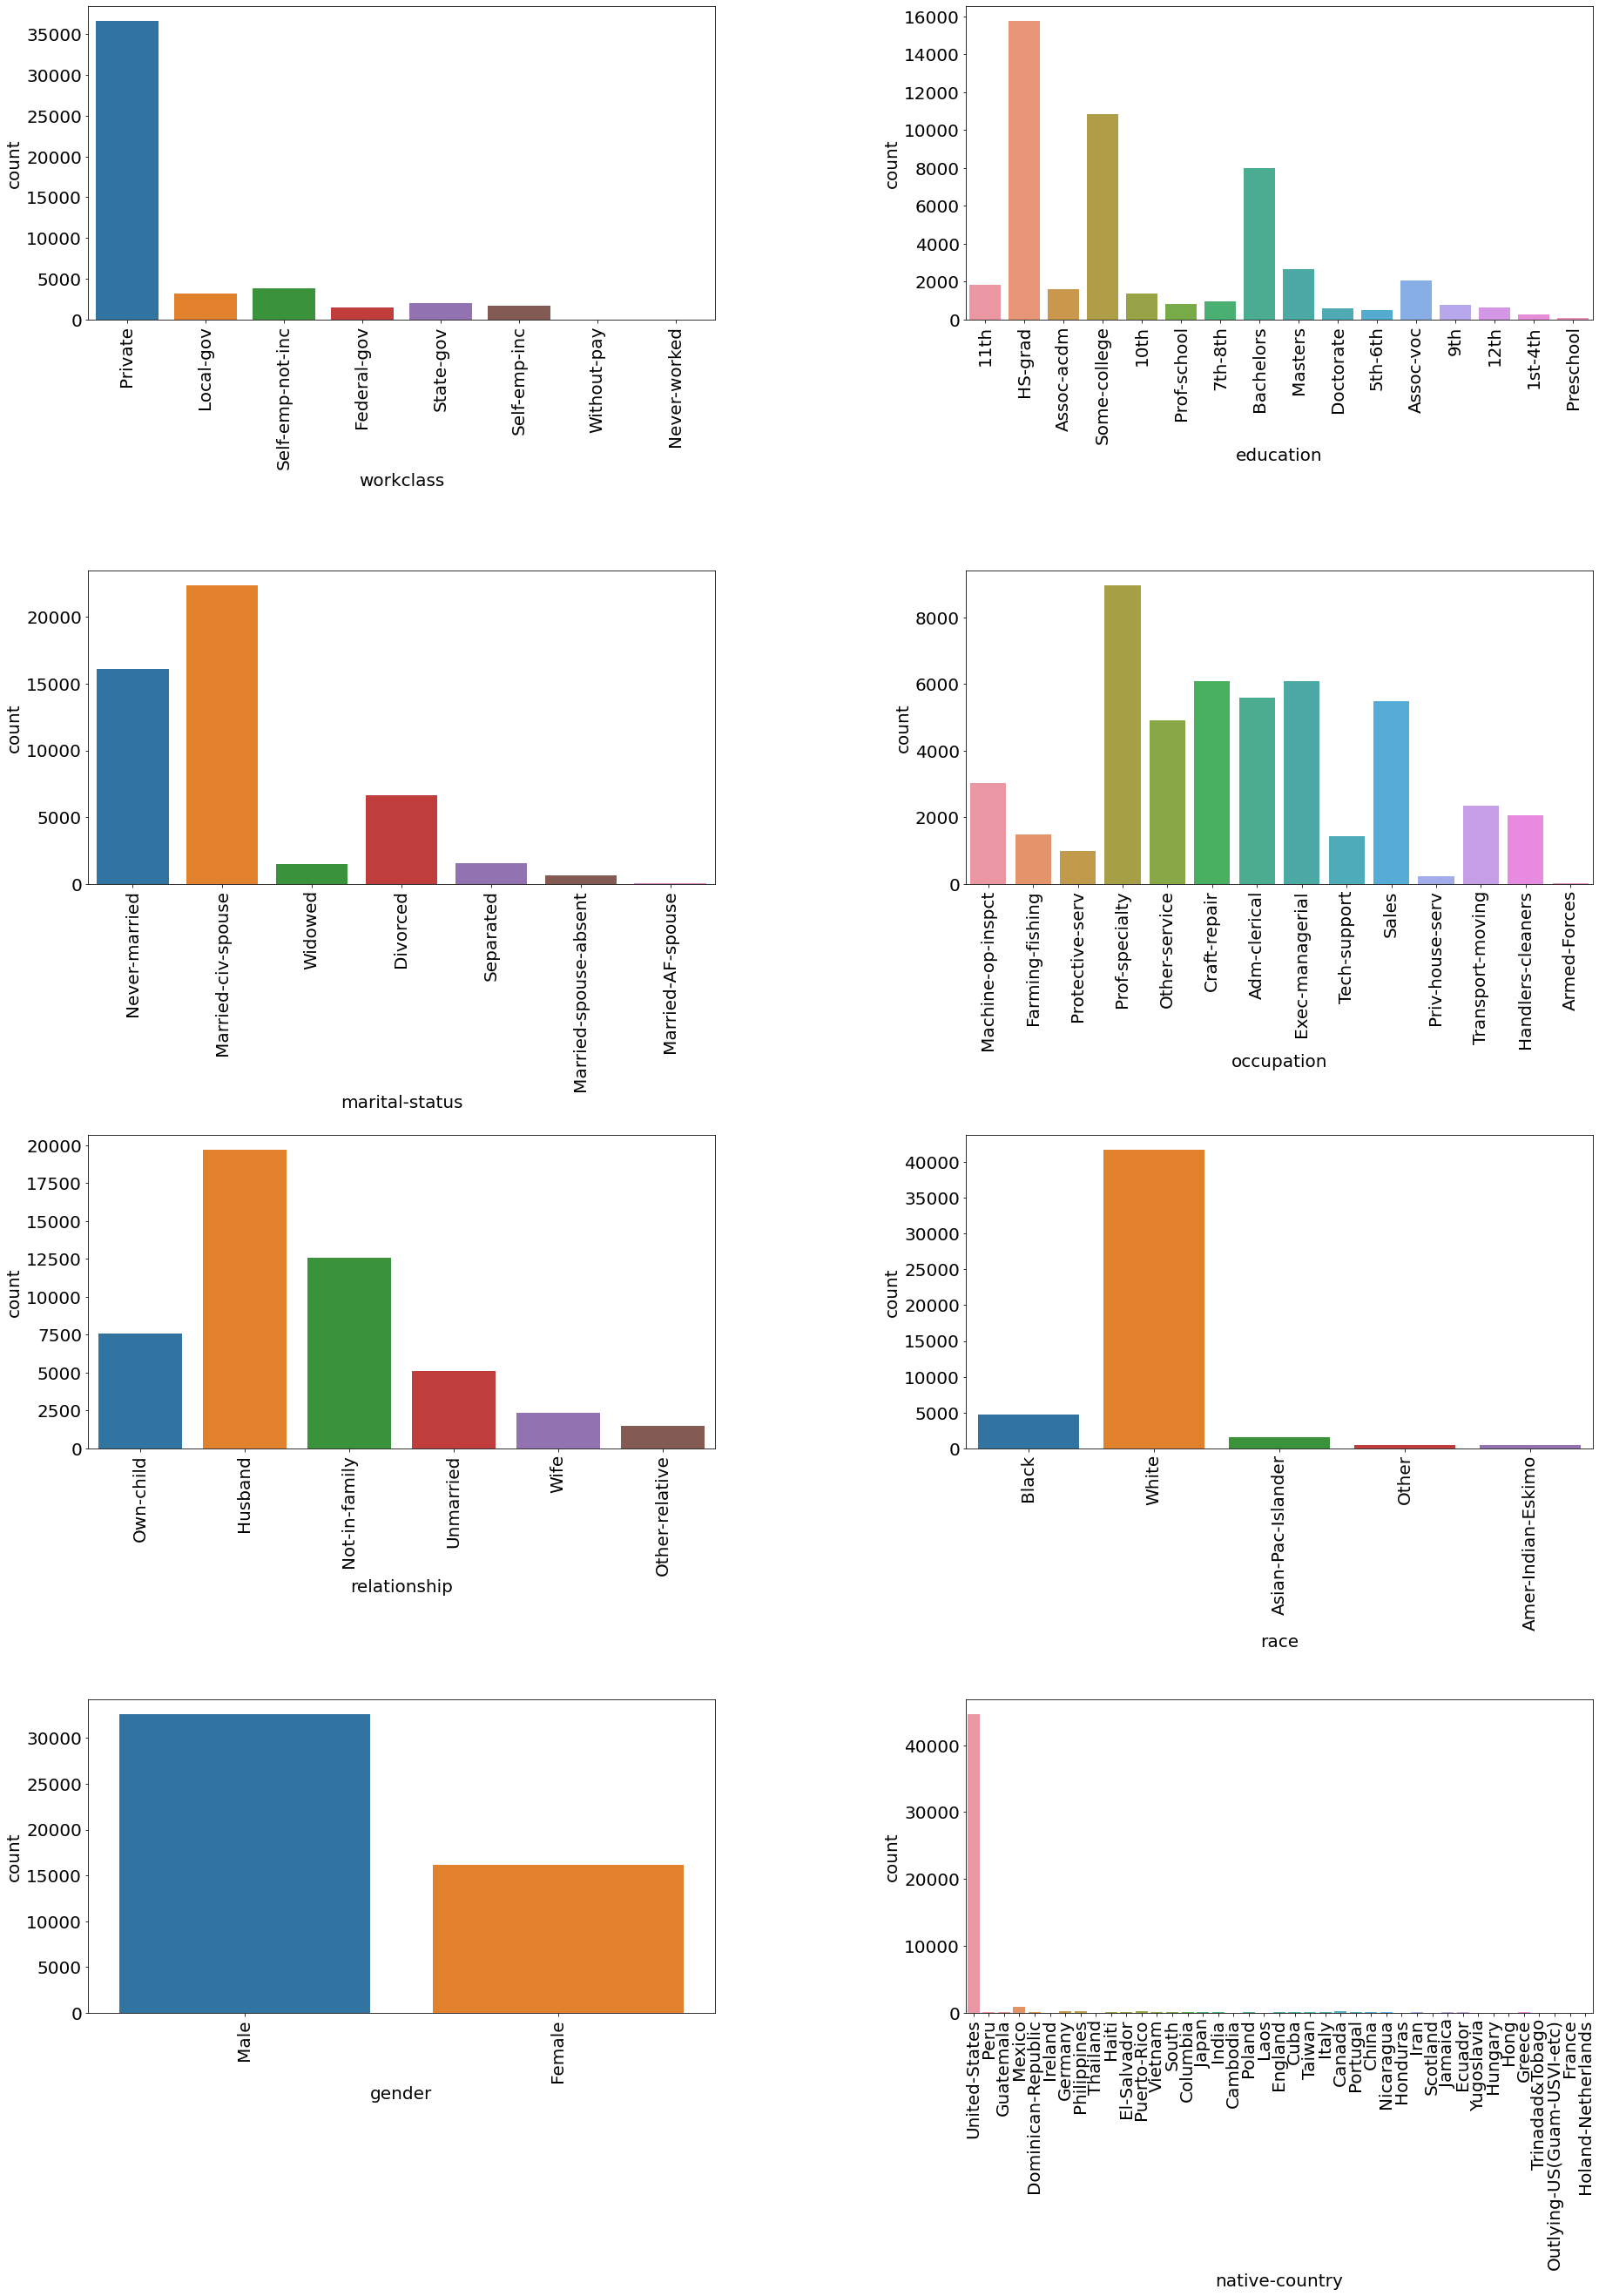

In [65]:
plt.figure(figsize=(30,40))
for i, col in enumerate(cat_col):
    plt.subplot(4,2,i+1)
    sns.countplot(df[col])
    plt.xlabel(col,fontsize = 20)
    plt.xticks(rotation = 90)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)

In [63]:
df[num_col].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886,0.239414
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729,0.426730
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


**`Conclusion`**

1. Students are more interested in `'electronics and communication engineering'`,`computer science & engineering`, `information technology`,`computer engineering`<br>
2. Male number of B.Tech graduates from Tier 2 colleges are much higher than females
2. Uttar Pradesh holding the highest number of colleges.<br>
3. Most of the student are passed out in 2012, 2013, 2014.<br>

### `Bivariate  Analysis`:<br>
When we talk about bivariate analysis, it means analyzing 2 variables. Since we know there are numerical and categorical variables, there is a way of analyzing these variables as shown below:
<br><br>
i) Numerical & Numerical<br>
   a. Scatterplot<br>
   b. Line plot<br>
   c. Heatmap for correlation<br><br>
ii) Numerical & Categorical<br>
   a. Bar chart<br>
   b. Categorical box plot<br><br>
iii) Categorical & Categorical<br>
   a. Bar chart<br>
   b. Grouped bar chart<br>


**`Correlation`**

In [66]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076451,0.030635,0.077185,0.056838,0.071223,0.230144
fnlwgt,-0.076451,1.000000,-0.038727,-0.003715,-0.004378,-0.013521,-0.006309
educational-num,0.030635,-0.038727,1.000000,0.125219,0.080986,0.143915,0.332802
capital-gain,0.077185,-0.003715,0.125219,1.000000,-0.031475,0.082152,0.223047
capital-loss,0.056838,-0.004378,0.080986,-0.031475,1.000000,0.054431,0.147542
hours-per-week,0.071223,-0.013521,0.143915,0.082152,0.054431,1.000000,0.227664
income,0.230144,-0.006309,0.332802,0.223047,0.147542,0.227664,1.000000


<AxesSubplot:>

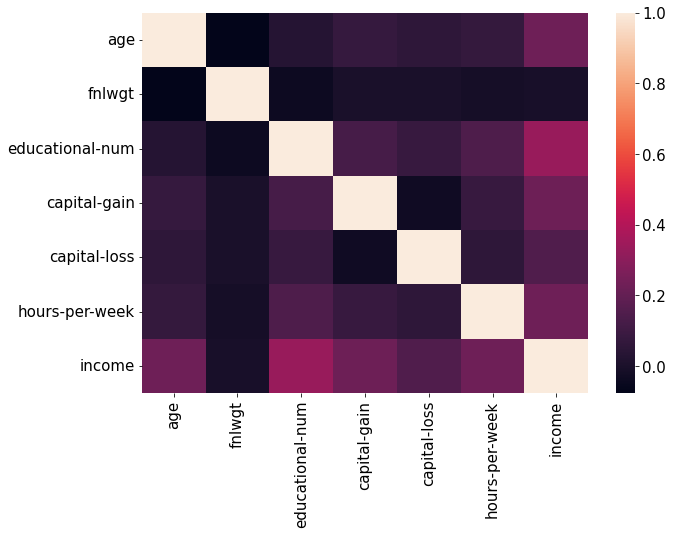

In [67]:
plt.figure(figsize = (10,7))
plt.rc('font',size = 15)
sns.heatmap(df[num_col].corr(), data = df)

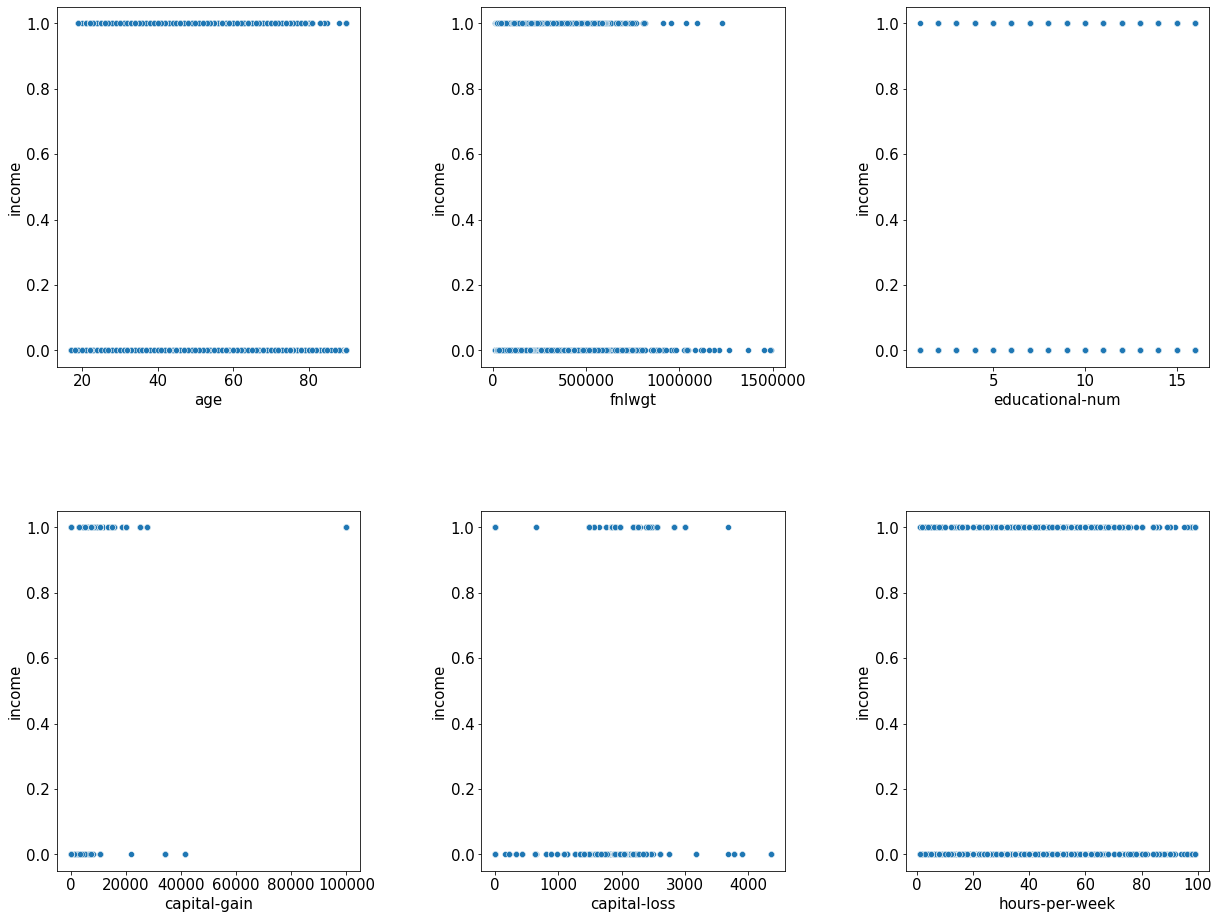

In [78]:
plt.figure(figsize = (20,15))

for i,col in enumerate(num_col[:-1]):
    plt.subplot(2,3,i+1)
    plt.ticklabel_format(style='plain')
    sns.scatterplot(x = col, y = 'income', data = df)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

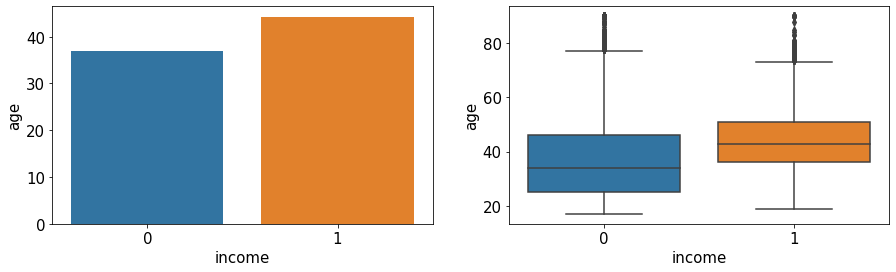

In [80]:
# income vs age
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.barplot(x = df['income'], y = df['age'],ci=0)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['income'], y = df['age'])
plt.show()

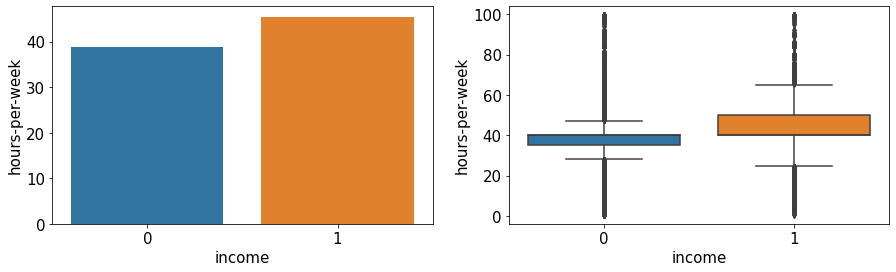

In [84]:
# income vs hours-per-week
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.barplot(x = df['income'], y = df['hours-per-week'],ci=0)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['income'], y = df['hours-per-week'])
plt.show()

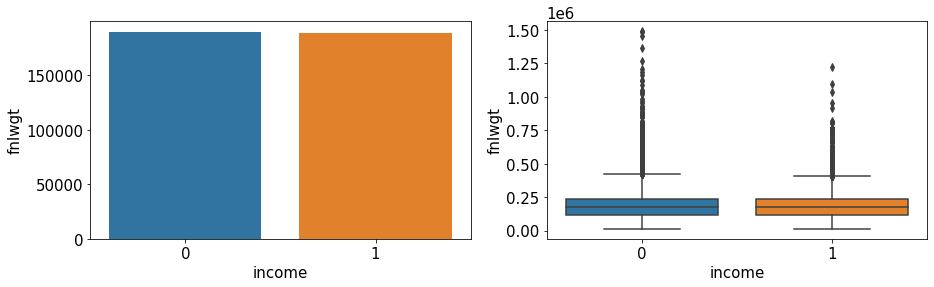

In [91]:
# income vs fnlwgt 
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.barplot(x = df['income'], y = df['fnlwgt'], ci=0)
plt.subplot(1, 2, 2)
sns.boxplot(x = df['income'], y = df['fnlwgt'])
plt.show()

In [92]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

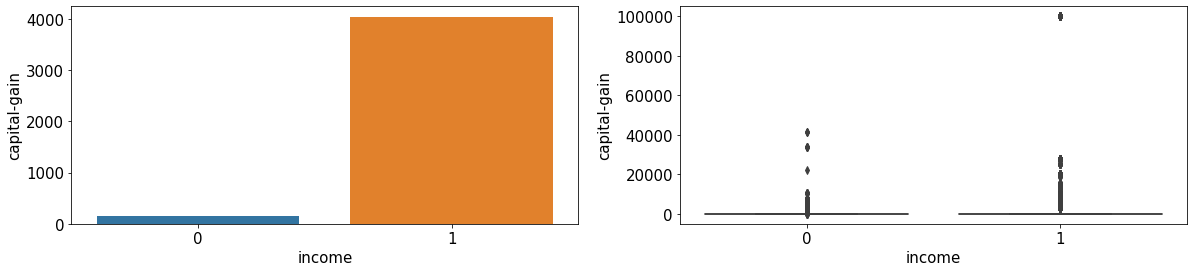

In [99]:
# income vs capital-gain 
plt.figure(figsize = (20, 4))
plt.subplot(1, 2, 1)
sns.barplot(x = df['income'], y = df['capital-gain'], ci=0)
plt.subplot(1, 2, 2)
sns.boxplot(x = df['income'], y = df['capital-gain'])
plt.show()

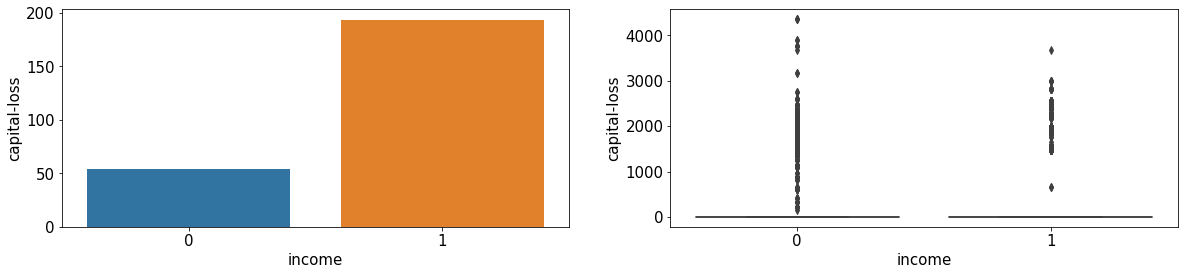

In [100]:
# income vs capital-loss 
plt.figure(figsize = (20, 4))
plt.subplot(1, 2, 1)
sns.barplot(x = df['income'], y = df['capital-loss'], ci=0)
plt.subplot(1, 2, 2)
sns.boxplot(x = df['income'], y = df['capital-loss'])
plt.show()

<AxesSubplot:xlabel='workclass', ylabel='count'>

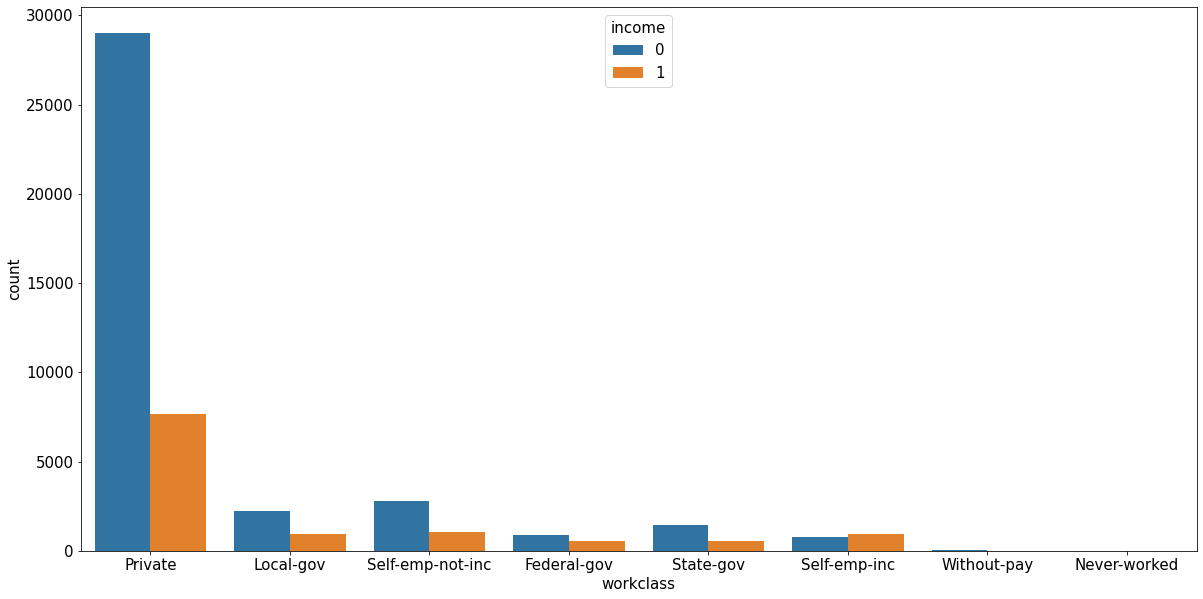

In [109]:
# workclass with income
plt.figure(figsize = (20, 10))
sns.countplot(x = df['workclass'],hue=df["income"])

<function matplotlib.pyplot.show(close=None, block=None)>

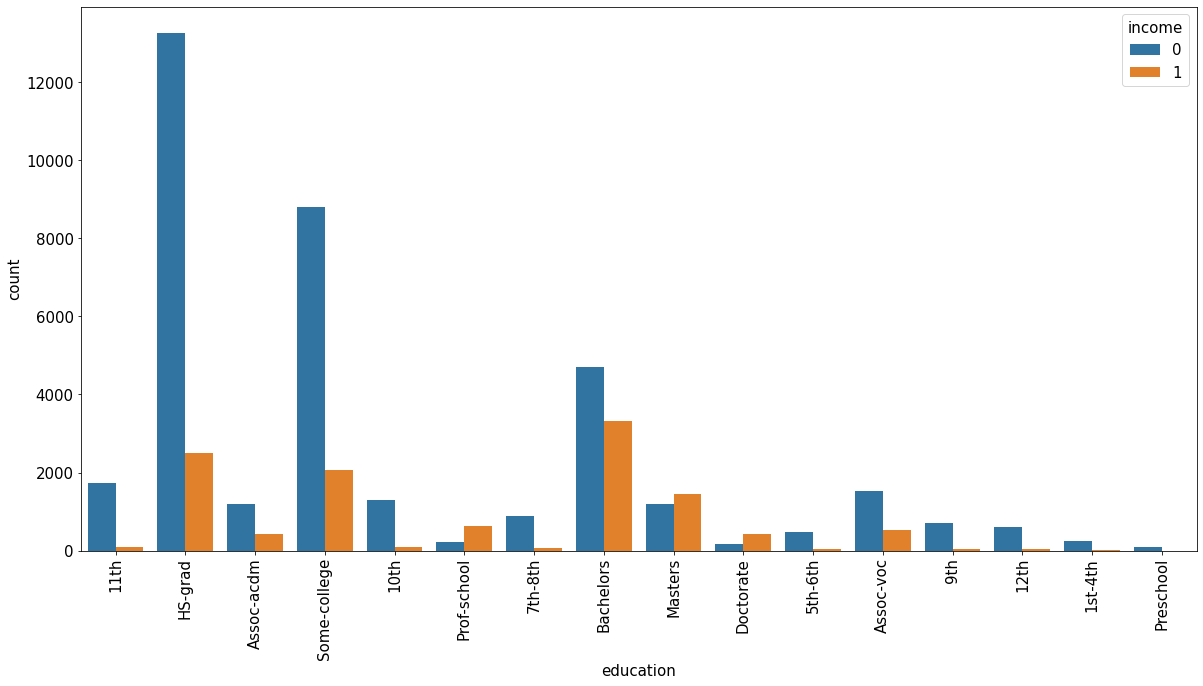

In [112]:
# education with income
plt.figure(figsize = (20, 10))
sns.countplot(x = df['education'],hue=df["income"])
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

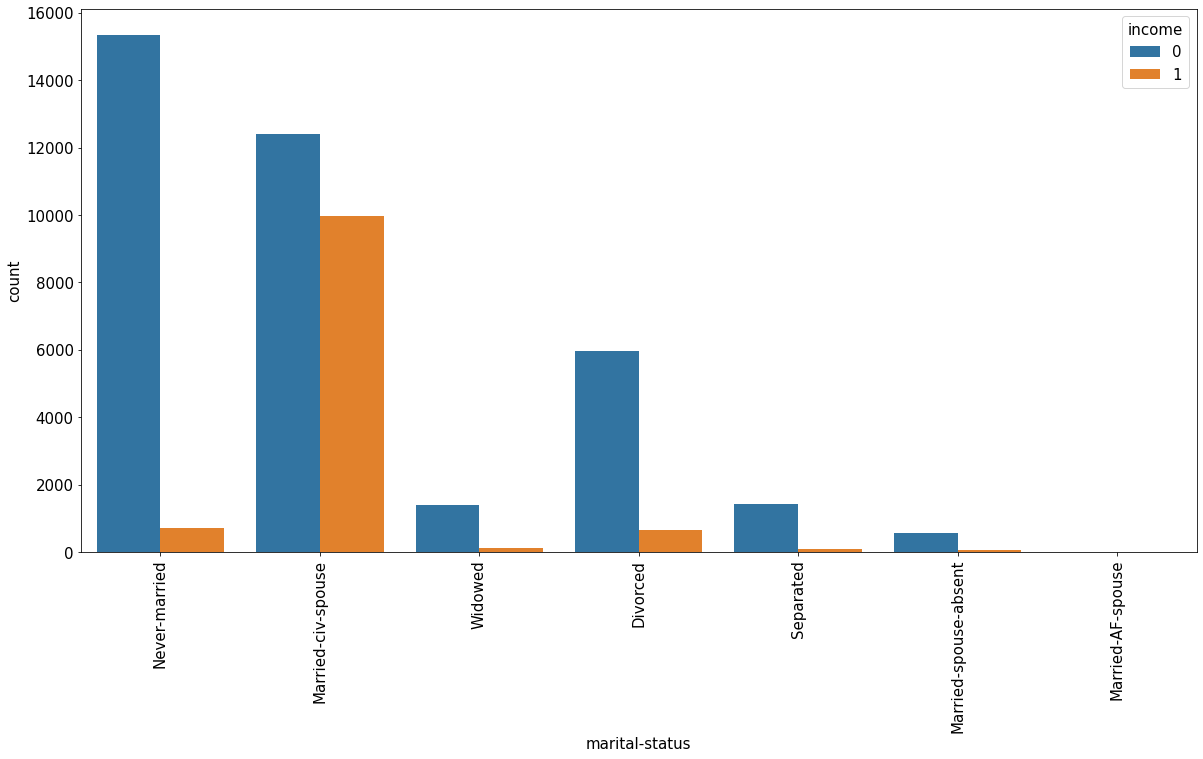

In [116]:
# marital-status with income
plt.figure(figsize = (20, 10))
sns.countplot(x = df['marital-status'],hue=df["income"])
plt.xticks(rotation = 90)
plt.show

In [120]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

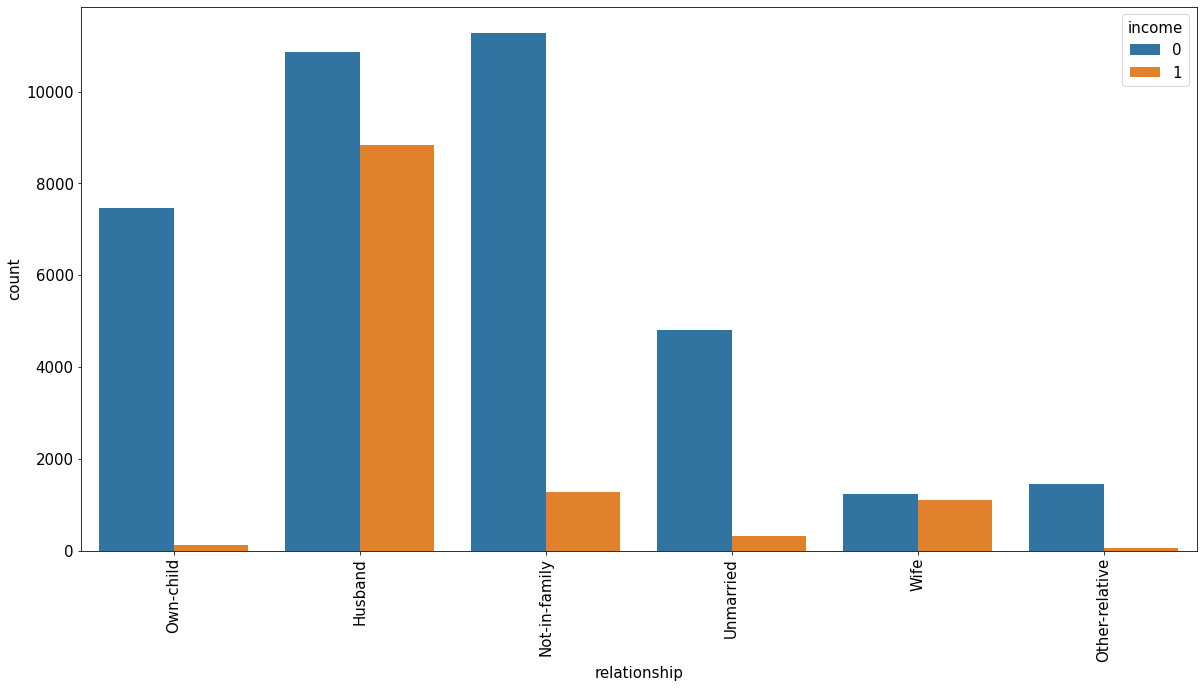

In [121]:
# relationship with income
plt.figure(figsize = (20, 10))
sns.countplot(x = df['relationship'],hue=df["income"])
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

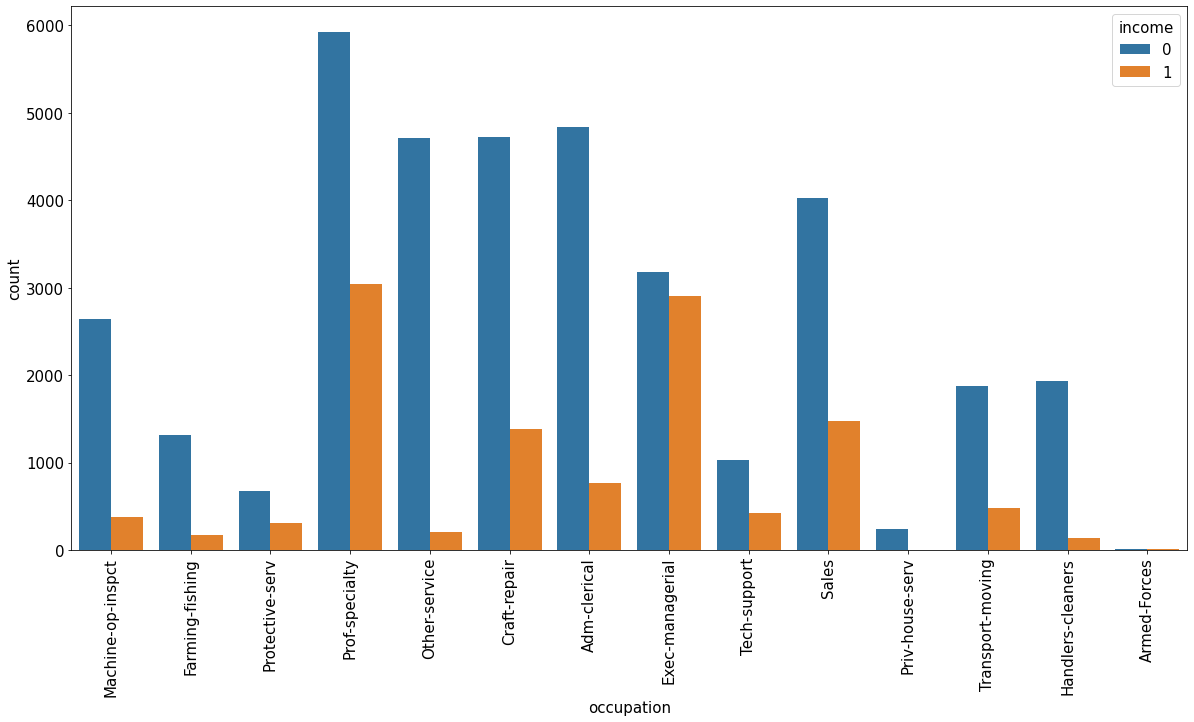

In [122]:
# occupation with income
plt.figure(figsize = (20, 10))
sns.countplot(x = df['occupation'],hue=df["income"])
plt.xticks(rotation = 90)
plt.show

## `Detecting and treating outliers`

In [125]:
df[(df[num_col].lt(q1 - 1.5*IQR) | df[num_col].gt(q3 + 1.5*IQR)).any(axis=1)]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,0
48783,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
48786,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48788,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [127]:
df.shape

(48790, 15)

In [130]:
df = df[~(df[num_col].lt(q1 - 1.5*IQR) | df[num_col].gt(q3 + 1.5*IQR)).any(axis=1)]

In [131]:
df[(df[num_col].lt(q1 - 1.5*IQR) | df[num_col].gt(q3 + 1.5*IQR)).any(axis=1)]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
